<a href="https://colab.research.google.com/github/tupilli/practies-projects/blob/main/Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code implementation

In [3]:
!pip install tflearn

     |████████████████████████████████| 107 kB 5.1 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=77f351e5b04ecd768ed61ec2c069a59530685f7e80a1246ae704800f7ec1bce6
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [4]:
 pip install keras

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np
np.random.seed(1000)
#(2)Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

# (3) create a sequential model
model = Sequential()
# 1st convolutional layer
model.add(Conv2D(filters=96,input_shape=(224,224,3), kernel_size=(11,11),strides=(4,4), padding='valid'))
model.add(Activation('relu'))
#pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
#Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

#2nd convolutional layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
#pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

#3rd Convolutional layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
#Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1), padding='valid'))
model.add(Activation('relu'))
#Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
#Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
#Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense Layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096,input_shape=(224*224*3,)))
model.add(Activation('relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Desne Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout 
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# (4) Compile
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# (5) Train
model.fit(x,y, batch_size=64, epochs=1, validation_split=0.2,shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_6 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_7 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)        

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1088/1088 [==============================] - 160s 147ms/sample - loss: 3.0665 - acc: 0.2142 - val_loss: 96.9174 - val_acc: 0.0662


In [8]:
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

In [9]:
x.shape

(1360, 224, 224, 3)

In [10]:
import matplotlib.pyplot as plt

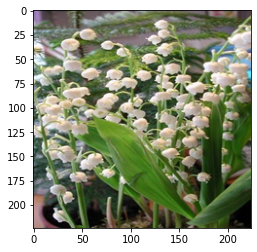

In [14]:
plt.imshow(x[10])